<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/Actividad_Semanal_6_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal 6 - Visualización**

# **Cargar datos**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
input = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

##**Descripción de la base de datos**

Esta investigación empleó una variable binaria, pago por defecto **(Sí = 1, No = 0**), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes **23 variables** como variables explicativas:

*   **X1**: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

*   **X2**: Género (1 = masculino; 2 = femenino).

*   **X3**: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros)

*   **X4**: Estado civil (1 = casado; 2 = soltero; 3 = otros).

*   **X5**: Edad (año).

*   **X6 - X11**: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:

    *   **X6** = el estado de pago en septiembre de 2005;
    *   **X7** = el estado de pago en agosto de 2005;
    *   **X11** = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

*  **X12-X17**: Importe del estado de cuenta (dólar NT).  

    *   **X12** = monto del estado de cuenta en septiembre de 2005;
    *   **X13** = monto del estado de cuenta en agosto de 2005;
    *   **X17** = monto del estado de cuenta en abril de 2005.

*   **X18-X23**: Monto del pago anterior (dólar NT).

    *   **X18** = monto pagado en septiembre de 2005;
    *   **X19** = monto pagado en agosto de 2005;
    *   **X23** = monto pagado en abril de 2005. 

# **Limpieza de datos**

Base de datos (DataFrame):

In [47]:
df_pca = pd.read_csv(input)
df_pca

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [4]:
df_pca.shape

(30000, 25)

In [5]:
print(df_pca.describe)

<bound method NDFrame.describe of           ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16   

El contendio de nuestro dataset es de de 29958 datos en 25 columnas.

#Renombramos las columnas

In [6]:
df_pca.rename(columns = {"X1": "Monto", "X2": "Genero", "X3": "Educacion", "X4" : "Estado_Civil", "X5" : "Edad",
                     "X6": "PAG_SEP", "X7": "PAG_AGO", "X8":"PAG_JUL", "X9": "PAG_JUN", "X10":"PAG_MAY", "X11": "AMORT.ABR", "X12": "ESTCTA_SEP", "X13": "ESTCTA_AGO", "X14": "ESTCTA_JUL", "X15":"ESTCTA_JUN",
                     "X16": "ESTCTA_MAY", "X17":"ESTCTA_ABR", "X18":"MP_SEP", "X19":"MP_AGO", "X20":"MP_JUL", "X21":"MP_JUN", "X22":"MP_MAY", "X23":"MP_ABR", "Y":"Var_Sal"}, inplace = True)


# Nos llevamos todos los valores vacíos

In [37]:
#Reemplazamos campos vacíos por 0 y dejamos 10 filas como muestra para trabajar
df_pca.dropna(axis = 0, inplace=True)
df_pca.head()

,ID,Monto,Genero,Educacion,Estado_Civil,Edad,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,...,ESTCTA_JUN,ESTCTA_MAY,ESTCTA_ABR,MP_SEP,MP_AGO,MP_JUL,MP_JUN,MP_MAY,MP_ABR,Var_Sal
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


2. Información de los datos

In [8]:
#Información de las columnas
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29958 non-null  int64  
 1   Monto         29958 non-null  int64  
 2   Genero        29958 non-null  float64
 3   Educacion     29958 non-null  float64
 4   Estado_Civil  29958 non-null  float64
 5   Edad          29958 non-null  float64
 6   PAG_SEP       29958 non-null  float64
 7   PAG_AGO       29958 non-null  float64
 8   PAG_JUL       29958 non-null  float64
 9   PAG_JUN       29958 non-null  float64
 10  PAG_MAY       29958 non-null  float64
 11  AMORT.ABR     29958 non-null  float64
 12  ESTCTA_SEP    29958 non-null  float64
 13  ESTCTA_AGO    29958 non-null  float64
 14  ESTCTA_JUL    29958 non-null  float64
 15  ESTCTA_JUN    29958 non-null  float64
 16  ESTCTA_MAY    29958 non-null  float64
 17  ESTCTA_ABR    29958 non-null  float64
 18  MP_SEP        29958 non-nu

In [9]:
X = df_pca.iloc[0:, 0:25]
y = df_pca.iloc[:, -1]

In [10]:
X.shape

(29958, 25)

In [11]:
y.shape

(29958,)

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [12]:
df_pca.isnull().sum()

ID              0
Monto           0
Genero          0
Educacion       0
Estado_Civil    0
Edad            0
PAG_SEP         0
PAG_AGO         0
PAG_JUL         0
PAG_JUN         0
PAG_MAY         0
AMORT.ABR       0
ESTCTA_SEP      0
ESTCTA_AGO      0
ESTCTA_JUL      0
ESTCTA_JUN      0
ESTCTA_MAY      0
ESTCTA_ABR      0
MP_SEP          0
MP_AGO          0
MP_JUL          0
MP_JUN          0
MP_MAY          0
MP_ABR          0
Var_Sal         0
dtype: int64

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [13]:
df_pca.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,29958.0,15005.550504,8654.547473,1.0,7516.25,15005.5,22497.75,30000.0
Monto,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Genero,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Educacion,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
Estado_Civil,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Edad,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
PAG_SEP,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
PAG_AGO,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
PAG_JUL,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
PAG_JUN,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0


5. Realiza el conteo de las variables categóricas

In [14]:
df_cat = df_pca.drop(["Monto", "Edad", "ESTCTA_SEP", "ESTCTA_AGO", "ESTCTA_JUL", "ESTCTA_JUN", "ESTCTA_MAY", "ESTCTA_ABR", "MP_SEP", "MP_AGO", "MP_JUL", "MP_JUN", "MP_MAY", "MP_ABR"], axis = 1)
df_cat

,ID,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
0,1,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
1,2,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
2,3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,29997,1.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
29997,29998,1.0,2.0,2.0,4.0,3.0,2.0,-1.0,0.0,0.0,1.0
29998,29999,1.0,3.0,1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0


In [15]:
df_cat.corr()

,ID,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
ID,1.000000,0.019466,0.038794,-0.028700,-0.030036,-0.010967,-0.018695,-0.003163,-0.022442,-0.020636,-0.013991
Genero,0.019466,1.000000,0.014701,-0.031478,-0.057637,-0.070690,-0.065648,-0.059586,-0.054319,-0.043291,-0.039730
Educacion,0.038794,0.014701,1.000000,-0.143431,0.105636,0.121632,0.114012,0.108640,0.097220,0.082077,0.028109
Estado_Civil,-0.028700,-0.031478,-0.143431,1.000000,0.019747,0.024052,0.032430,0.032826,0.035360,0.034191,-0.024544
PAG_SEP,-0.030036,-0.057637,0.105636,0.019747,1.000000,0.672290,0.574706,0.539384,0.509783,0.474809,0.324769
PAG_AGO,-0.010967,-0.070690,0.121632,0.024052,0.672290,1.000000,0.766857,0.662429,0.622990,0.575434,0.263761
PAG_JUL,-0.018695,-0.065648,0.114012,0.032430,0.574706,0.766857,1.000000,0.777245,0.686447,0.632396,0.235765
PAG_JUN,-0.003163,-0.059586,0.108640,0.032826,0.539384,0.662429,0.777245,1.000000,0.819655,0.716278,0.217037
PAG_MAY,-0.022442,-0.054319,0.097220,0.035360,0.509783,0.622990,0.686447,0.819655,1.000000,0.816660,0.204549
AMORT.ABR,-0.020636,-0.043291,0.082077,0.034191,0.474809,0.575434,0.632396,0.716278,0.816660,1.000000,0.186903


6. Escalamos

In [16]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cat)

scaled[:5]

array([[-1.7337476 ,  0.8096885 ,  0.18584882, -1.05708615,  1.79464177,
         1.78258329, -0.69667977, -0.66663037, -1.53070038, -1.48651337,
         1.87668918],
       [-1.73363205,  0.8096885 ,  0.18584882,  0.85883054, -0.874468  ,
         1.78258329,  0.13943643,  0.18924143,  0.23563523,  1.99391629,
         1.87668918],
       [-1.73351651,  0.8096885 ,  0.18584882,  0.85883054,  0.01523526,
         0.11194994,  0.13943643,  0.18924143,  0.23563523,  0.25370146,
        -0.53285329],
       [-1.73340096,  0.8096885 ,  0.18584882, -1.05708615,  0.01523526,
         0.11194994,  0.13943643,  0.18924143,  0.23563523,  0.25370146,
        -0.53285329],
       [-1.73328541, -1.23504286,  0.18584882, -1.05708615, -0.874468  ,
         0.11194994, -0.69667977,  0.18924143,  0.23563523,  0.25370146,
        -0.53285329]])

7. Reduce las dimensiones con PCA, si consideras necesario:
  - Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [17]:
scaled_df = pd.DataFrame(scaled, columns=df_cat.columns)
scaled_df.head()

,ID,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
0,-1.733748,0.809689,0.185849,-1.057086,1.794642,1.782583,-0.696680,-0.666630,-1.530700,-1.486513,1.876689
1,-1.733632,0.809689,0.185849,0.858831,-0.874468,1.782583,0.139436,0.189241,0.235635,1.993916,1.876689
2,-1.733517,0.809689,0.185849,0.858831,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.532853
3,-1.733401,0.809689,0.185849,-1.057086,0.015235,0.111950,0.139436,0.189241,0.235635,0.253701,-0.532853
4,-1.733285,-1.235043,0.185849,-1.057086,-0.874468,0.111950,-0.696680,0.189241,0.235635,0.253701,-0.532853


In [48]:
col_cat = ["Genero", "Educacion", "Estado_Civil", "PAG_SEP", "PAG_AGO", "PAG_JUL", "PAG_JUN", "PAG_MAY", "AMORT.ABR", "Var_Sal"]

summary = {
  "Varianzas": scaled_df[col_cat].var()[0:10],
  "Valor Min": scaled_df[col_cat].min()[0:10],
  "Valor Max": scaled_df[col_cat].max()[0:10]
}
#recuerda que la variable col_cat la definimos más arriba.
pd.DataFrame(summary, index = col_cat).transpose()

,Genero,Educacion,Estado_Civil,PAG_SEP,PAG_AGO,PAG_JUL,PAG_JUN,PAG_MAY,AMORT.ABR,Var_Sal
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.235043,-2.344330,-2.973003,-1.764171,-1.558683,-1.532796,-1.522502,-1.530700,-1.486513,-0.532853
Valor Max,0.809689,5.246207,2.774747,7.132861,6.794483,6.828366,7.036216,7.300978,7.214561,1.876689


In [49]:
t_gen = df_cat.var().sum()

In [20]:
var_Genero = df_cat.Genero.var()

print('Varianza Total \t:',t_gen.round(2) )
print('Varianza Genero :', ((var_Genero/t_gen)*100).round(2),'%' )

Varianza Total 	: 74901201.37
Varianza Genero : 0.0 %


In [21]:
t_edu = df_cat.var().sum()

var_Educacion = df_cat.Educacion.var()

print('Varianza Total \t:', t_edu.round(2) )
print('Varianza Educación:', ((var_Educacion/t_edu)*100).round(2),'%' )

Varianza Total 	: 74901201.37
Varianza Educación: 0.0 %


In [24]:
t_ec = df_cat.var().sum()

var_Estado_Civil = df_cat.Estado_Civil.var()

print('Varianza Total \t:', t_ec.round(2) )
print('Varianza Educación:', ((var_Estado_Civil/t_ec)*100).round(2),'%' )

Varianza Total 	: 74901201.37
Varianza Educación: 0.0 %


In [56]:
df_varianza = PCA()
df_varianza.fit(df_cat.iloc[:, 3:].dropna(axis=0))
df_varianzaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(df_varianza.explained_variance_),
                             'Proportion of variance': df_varianza.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(df_varianza.explained_variance_ratio_)
                             })
df_varianzaSummary_df = df_varianzaSummary_df.transpose()
df_varianzaSummary_df

,0,1,2,3,4,5,6,7
Standard deviation,2.415291,0.961497,0.739525,0.603156,0.522405,0.517271,0.423903,0.388553
Proportion of variance,0.683099,0.108253,0.064040,0.042600,0.031956,0.031331,0.021042,0.017678
Cumulative proportion,0.683099,0.791353,0.855393,0.897992,0.929949,0.961280,0.982322,1.000000


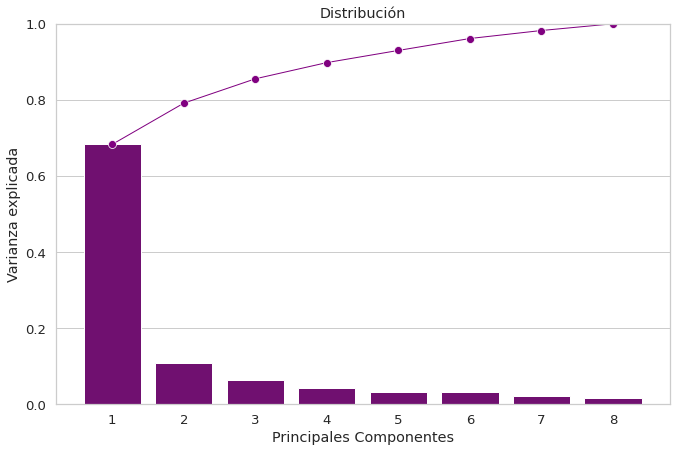

In [75]:
PC_components = np.arange(df_varianza.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(11, 7))

_ = sns.barplot(x = PC_components, 
                y = df_varianza.explained_variance_ratio_, 
                color = 'purple'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(df_varianza.explained_variance_ratio_), 
                 color = 'purple', 
                 linestyle = '-', 
                 linewidth = 1, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Distribución')
plt.xlabel('Principales Componentes')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()